In [8]:
!Pip install keras
!pip install tensorflow


  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=67aa1c8927e01088197efa56755141a3fb023ca7a4d33bd7b2b4537c732a9059
  Stored in directory: c:\users\olubi\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [9]:
# multilayer perceptron model for the two circles problem
import tensorflow as tf
from tensorflow import keras
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from sklearn.datasets import make_circles

from matplotlib import pyplot
from numpy import where


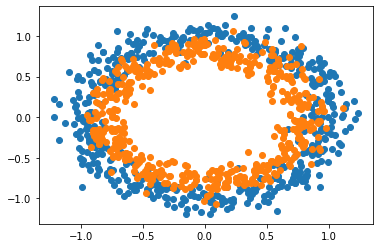

In [2]:
# plot the dataset generated on a graph, shows two concentric circles for points belonging to class 0 and class 1.
# Example of generating samples from the two circle problem
# generate dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# scatter plot, dots colored by class value
for i in range(2):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])
pyplot.show()

In [3]:
# split into train and test
n_test = 500
trainX, testX = X[:n_test, :], X[n_test:, :]
trainy, testy = y[:n_test], y[n_test:]

In [4]:
# define model
model = Sequential()
model.add(Dense(100, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1_m, precision_m, recall_m])


In [6]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=300, verbose=0)

In [16]:
# evaluate the model - Option 1
loss, accuracy, f1_score, precision, recall = model.evaluate(trainX, trainy, verbose=0)
print('Train - Loss: %.3f, accuracy: %.3f, f1_score: %.3f, precision: %.3f, recall: %.3f' % (loss, accuracy, f1_score, precision, recall))

loss, accuracy, f1_score, precision, recall = model.evaluate(testX, testy, verbose=0)
print('Test - Loss: %.3f, accuracy: %.3f, f1_score: %.3f, precision: %.3f, recall: %.3f' % (loss, accuracy, f1_score, precision, recall))

Train - Loss: 0.379, accuracy: 0.826, f1_score: 0.825, precision: 0.804, recall: 0.863
Test - Loss: 0.368, accuracy: 0.844, f1_score: 0.845, precision: 0.835, recall: 0.863


In [17]:
#Option 2 - you can use sklearn classification report
from sklearn.metrics import classification_report

y_pred = model.predict(testX, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(testy, y_pred_bool))

8/8 [==============================] - 0s 709us/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.66       248
           1       0.00      0.00      0.00       252

    accuracy                           0.50       500
   macro avg       0.25      0.50      0.33       500
weighted avg       0.25      0.50      0.33       500



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# Option 3
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = model.predict(testX)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(testy, y_pred , average="macro"))
print(recall_score(testy, y_pred , average="macro"))
print(f1_score(testy, y_pred , average="macro"))

0.248
0.5
0.3315508021390374


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


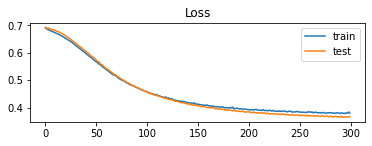

In [19]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

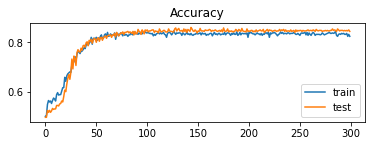

In [20]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()